# Model 2 - Anticline

A simple anticline structure. We start by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


Creating the model by importing the input data and displaying it:

In [2]:
path_to_data = os.pardir+"/data/input_data/jan_models/"

geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                          path_o = path_to_data + "model2_orientations.csv",
                          path_i = path_to_data + "model2_surface_points.csv") 

Active grids: ['regular']


In [3]:
geo_data.get_data().head()

X    Y    Z     X_r     Y_r     Z_r surface  \
surface_points 0    0  100  200  0.2501  0.3001  0.3451   rock1   
               1    0  500  200  0.2501  0.5001  0.3451   rock1   
               2    0  900  200  0.2501  0.7001  0.3451   rock1   
               3  400  100  600  0.4501  0.3001  0.5451   rock1   
               4  400  500  600  0.4501  0.5001  0.5451   rock1   

                          series  id  order_series    smooth  G_x  G_y  G_z  \
surface_points 0  Default series   1             1  0.000001  NaN  NaN  NaN   
               1  Default series   1             1  0.000001  NaN  NaN  NaN   
               2  Default series   1             1  0.000001  NaN  NaN  NaN   
               3  Default series   1             1  0.000001  NaN  NaN  NaN   
               4  Default series   1             1  0.000001  NaN  NaN  NaN   

                  dip  azimuth  polarity  
surface_points 0  NaN      NaN       NaN  
               1  NaN      NaN       NaN  
               2  NaN      NaN       NaN  
               3  NaN      NaN       NaN  
               4  NaN      NaN       NaN

Setting and ordering the units and series:

In [4]:
gp.map_series_to_surfaces(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')})

,surface,series,order_surfaces,isActive,color,id
0,rock1,Strat_Series,1,True,#015482,1
1,rock2,Strat_Series,2,True,#9f0052,2
2,basement,Basement_Series,1,True,#ffbe00,3


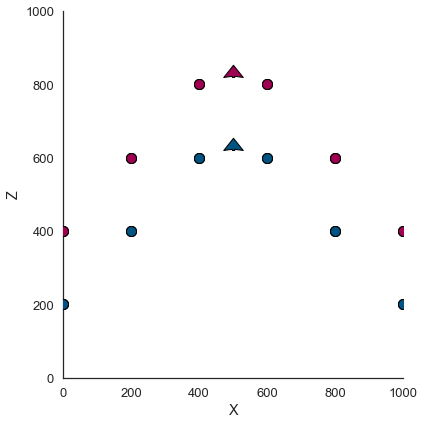

In [5]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

Calculating the model:

In [6]:
interp_data = gp.set_interpolation_data(geo_data, theano_optimizer='fast_compile')

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [7]:
geo_data.update_to_interpolator()

True

In [8]:
geo_data.orientations

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
1,500,500,620,0.5001,0.5001,0.5551,1.000000e-12,1.000000e-12,1.0,0,90,1,rock1,Strat_Series,1,1,0.01
0,500,500,820,0.5001,0.5001,0.6551,1.000000e-12,1.000000e-12,1.0,0,90,1,rock2,Strat_Series,2,1,0.01


In [9]:
geo_data.interpolator.theano_graph.nugget_effect_grad_T.get_value()

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [10]:
sol = gp.compute_model(geo_data)

../../gempy/core/solution.py:266: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


Displaying the result in y and x direction:

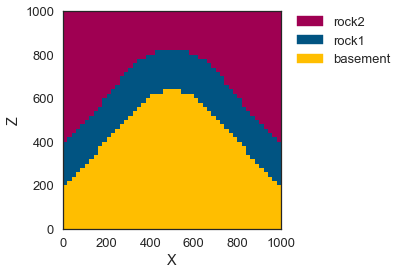

In [11]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=15,
                         direction='y', show_data=True)

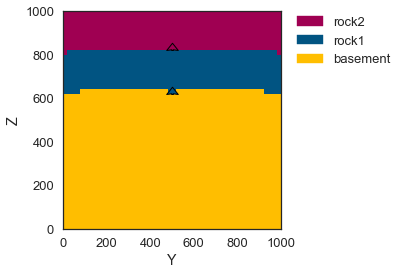

In [12]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                         direction='x', show_data=True)

In [13]:
from gempy.addons import gempy_to_rexfile as rex

In [15]:
rex.geo_model_to_res(interp_data)

AttributeError: 'InterpolatorModel' object has no attribute 'solutions'